# Ejercicio 3
#### Métodos computacionales:
##### Marsili - Caracoix - Wolodarsky

In [131]:
from matricesRalas import ListaEnlazada, MatrizRala, GaussJordan, multiplicar_matriz_vector
import matplotlib.pyplot as plt

Comenzamos por importar las bibiliotecas necesarias y luego armar las asignaciones correspondientes a partir de la Figura 3.

In [132]:
# a = 0
# b = 1
# c = 2
# d = 3
# e = 4
# f = 5
# g = 6
# h = 7
# i = 8
# j = 9
# k = 10

assignments = {
    (1, 0): 1, (5, 0): 1, (6, 0): 1, # B, F y G citan a A
    (0, 2): 1, (0, 3): 1, (0, 4): 1, # A cita a C, D y E
    (8, 5): 1, # I cita a F
    (5, 6): 1, # F cita a G
    (6, 7): 1, # G cita a H
    (6, 8): 1, (7, 8): 1, (9, 8): 1, # G, H y J citan a A
    (4, 10): 1 # E cita a K
}

Inicializamos la matriz W, cuadrada, con el tamaño correspondiente a la cantidad de papers presentados en la Figura 3. 

In [133]:
len_papers = 11
w = MatrizRala(len_papers,len_papers)

# Función generadora de la matriz W (citaciones):
def build_w(matriz, citas):
    for indices, value in assignments.items():
        w[indices] = value
    return w

W = build_w(w, assignments)
print(W)

MatrizRala([ 
    [ 0 0 1 1 1 0 0 0 0 0 0 ]
    [ 1 0 0 0 0 0 0 0 0 0 0 ]
    [ 0 0 0 0 0 0 0 0 0 0 0 ]
    [ 0 0 0 0 0 0 0 0 0 0 0 ]
    [ 0 0 0 0 0 0 0 0 0 0 1 ]
    [ 1 0 0 0 0 0 1 0 0 0 0 ]
    [ 1 0 0 0 0 0 0 1 1 0 0 ]
    [ 0 0 0 0 0 0 0 0 1 0 0 ]
    [ 0 0 0 0 0 1 0 0 0 0 0 ]
    [ 0 0 0 0 0 0 0 0 1 0 0 ]
    [ 0 0 0 0 0 0 0 0 0 0 0 ]
])


Luego, procedemos a completar la matriz D, a matriz es una matriz diagonal en la que cada entrada contiene el valor inverso del número de citas que recibe el paper determinado.

In [134]:
# Función generadora de la matriz D (probabilidad de citaciones):
def build_d(matriz_w):
    D = MatrizRala(matriz_w.shape[0], matriz_w.shape[1])
    
    for i in range(matriz_w.shape[1]):
        cj = 0
        for j in range(matriz_w.shape[0]):
            cj += matriz_w[j,i]
        if cj != 0:
            D[i,i] = 1 if (round(1/cj, 3) == 1) else round(1/cj , 3)
        else:
            D[i,i] = 0

    return D

D = build_d(W)
print(D)

MatrizRala([ 
    [ 0.333 0 0 0 0 0 0 0 0 0 0 ]
    [ 0 0 0 0 0 0 0 0 0 0 0 ]
    [ 0 0 1 0 0 0 0 0 0 0 0 ]
    [ 0 0 0 1 0 0 0 0 0 0 0 ]
    [ 0 0 0 0 1 0 0 0 0 0 0 ]
    [ 0 0 0 0 0 1 0 0 0 0 0 ]
    [ 0 0 0 0 0 0 1 0 0 0 0 ]
    [ 0 0 0 0 0 0 0 1 0 0 0 ]
    [ 0 0 0 0 0 0 0 0 0.333 0 0 ]
    [ 0 0 0 0 0 0 0 0 0 0 0 ]
    [ 0 0 0 0 0 0 0 0 0 0 1 ]
])


En los próximos dos bloques de código, creamos la matriz identidad la cual será útil para GaussJordan y la matriz de unos necesaria para la fórmula que nos compete para hallar pestrella.

In [135]:
# Función generadora de la matriz identidad:
def matriz_identidad(n,m):
    matriz = MatrizRala(n,m)

    for i in range(matriz.shape[1]):
        matriz[i,i] = 1
    return matriz

In [136]:
# Función generadora de la matriz de unos:
def matriz_de_unos(n,m):
    matriz = MatrizRala(n,m)
    for i in range(matriz.shape[0]):
        for j in range(matriz.shape[1]):
            matriz[i,j] = 1
    return matriz

A continuación se resuelve pestrella, el vector de probabilidades, con GaussJordan:

In [137]:
# Inicialización de variables utilizadas posteriormente en GaussJordan:
d = 0.85
N = len_papers
matriz_identidad = matriz_identidad(len_papers,len_papers)

# Planteamos el sistema que nos interesa resolver con GaussJordan:
A = (matriz_identidad - (d*W)@D)
b = MatrizRala(len_papers,1)
for i in range(len_papers):
    b[i,0]= (1 - d)/N

# Llamado a la función auxiliar GaussJordan
pestrella = GaussJordan(A,b)
print(pestrella)
suma = 0 
for i in range(len_papers):
    suma = suma + pestrella[i,0]

MatrizRala([ 
    [ 0.058261363636363646 ]
    [ 0.030127242613636366 ]
    [ 0.01363636363636364 ]
    [ 0.01363636363636364 ]
    [ 0.02522727272727273 ]
    [ 0.11526591414834621 ]
    [ 0.10016314298201158 ]
    [ 0.04522825081337235 ]
    [ 0.11161239066245791 ]
    [ 0.04522825081337235 ]
    [ 0.01363636363636364 ]
])


En cambio, en esta parte se resuelve de forma iterativa, no mediante GaussJordan, esto nos será útil para el próximo ejercicio, el 4. 

In [138]:
def P_it(d,N,W,D):
    p_t = MatrizRala(N,1)
    for i in range(N):
        p_t[i,0] = 1/N

    tolerance = 1e-6
    errores = []
    error = 1
    
    mat_unos = matriz_de_unos(N,1)
    unoMenosDeSobreEne = ((1-d)/N) * mat_unos
    d_W = d * W
    d_WD = d_W @ D


    while error > tolerance:
        # Multiplica la matriz W_D por el vector p_t y escala por d
        p_t_plus_1 = d_WD @ p_t
        p_t_plus_1 = unoMenosDeSobreEne + p_t_plus_1
        # Calcula el error máximo en esta iteración comparando el nuevo vector de PageRank con el anterior
        error = max(abs(p_t_plus_1[i,0] - p_t[i,0]) for i in range(N))
        errores.append(error)

        # Actualiza el vector de PageRank para la próxima iteración
        p_t = p_t_plus_1
    return p_t, errores

In [139]:
pIt, errores = P_it(0.85,len_papers,W,D)
print("\n\nMétodo iterativo de PageRank con distribución inicial equiprobable:", pIt)
print("\n\nErrores en cada iteración:", errores)



Método iterativo de PageRank con distribución inicial equiprobable: MatrizRala([ 
    [ 0.058261363636363646 ]
    [ 0.03012724261363637 ]
    [ 0.01363636363636364 ]
    [ 0.01363636363636364 ]
    [ 0.02522727272727273 ]
    [ 0.11526814567420816 ]
    [ 0.10016511431015132 ]
    [ 0.04522916790809512 ]
    [ 0.111614852638223 ]
    [ 0.04522916790809512 ]
    [ 0.01363636363636364 ]
])


Errores en cada iteración: [0.15454545454545454, 0.13136363636363635, 0.07436495454545458, 0.04214540842670453, 0.03582359716269884, 0.017755237910082308, 0.01509195222356996, 0.012828159390034469, 0.004674446423264464, 0.004409460998151898, 0.0037480418484291123, 0.0031858355711647524, 0.0012630193597793216, 0.0010735664558124136, 0.0009125314874405543, 0.0006095648362662714, 0.0003920855587971894, 0.0003332727249776013, 0.00028328181623095416, 0.00011873459626447758, 0.00010092440682479831, 8.578574580107856e-05, 7.159629657625677e-05, 4.09047387925493e-05, 3.476902797366899e-05, 2.9553673777618

En los siguientes bloques se imprime la solución y posteriormente se compara gráficamente lo obtenido a partir de GaussJordan y el método iterativo. 

In [140]:
def print_ranking(pestrella):
    # Crear una lista de tuplas (índice, valor)
    ranking = [(i, pestrella[i,0]) for i in range((pestrella.shape[0]))]
    
    # Ordenar la lista en orden descendente por el valor
    ranking.sort(key=lambda x: x[1], reverse=True)
    
    # Crear un diccionario para mapear los índices a las letras
    letras = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K'}
    
    # Imprimir el ranking
    for i, valor in ranking:
        print(f'Paper {letras[i]}: {valor}')

# Llamar a la función para imprimir el ranking
print_ranking(pestrella)

Paper F: 0.11526591414834621
Paper I: 0.11161239066245791
Paper G: 0.10016314298201158
Paper A: 0.058261363636363646
Paper H: 0.04522825081337235
Paper J: 0.04522825081337235
Paper B: 0.030127242613636366
Paper E: 0.02522727272727273
Paper C: 0.01363636363636364
Paper D: 0.01363636363636364
Paper K: 0.01363636363636364


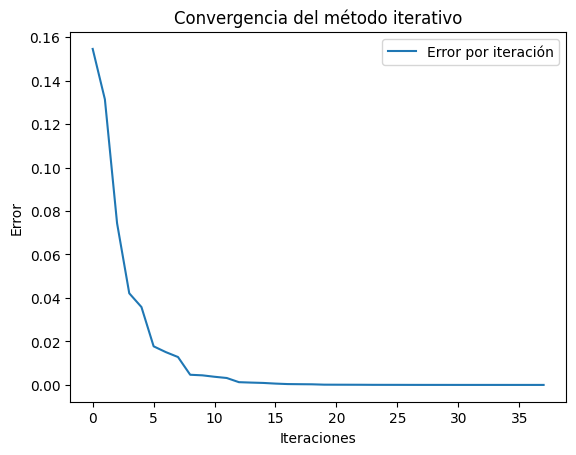

In [141]:
# Función graficadora y comparadora de soluciones:
def compare_and_plot(pIt, pestrella, errores):
    diff_abs = [abs(pIt[i, 0] - pestrella[i, 0]) for i in range(len_papers)]
    iteraciones = list(range(len(errores)))

    plt.plot(iteraciones, errores, label='Error por iteración')
    plt.xlabel('Iteraciones')
    plt.ylabel('Error')
    plt.title('Convergencia del método iterativo')
    plt.legend()
    plt.show()

compare_and_plot(pIt, pestrella, errores)